In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 500
Nx = 60
Ny = 60
x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Nx)
t = np.linspace(0,10,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = 0.3


In [3]:
def ui(x,y):
    
    return 5 * np.exp(-(x**2 + y**2))

In [4]:
u = np.zeros((Nt, Nx, Ny))
        
for i in range(1,Nx-1):
    for j in range(1,Ny-1):
        u[0, i, j] = ui(x[i], y[j])

<IPython.core.display.Javascript object>


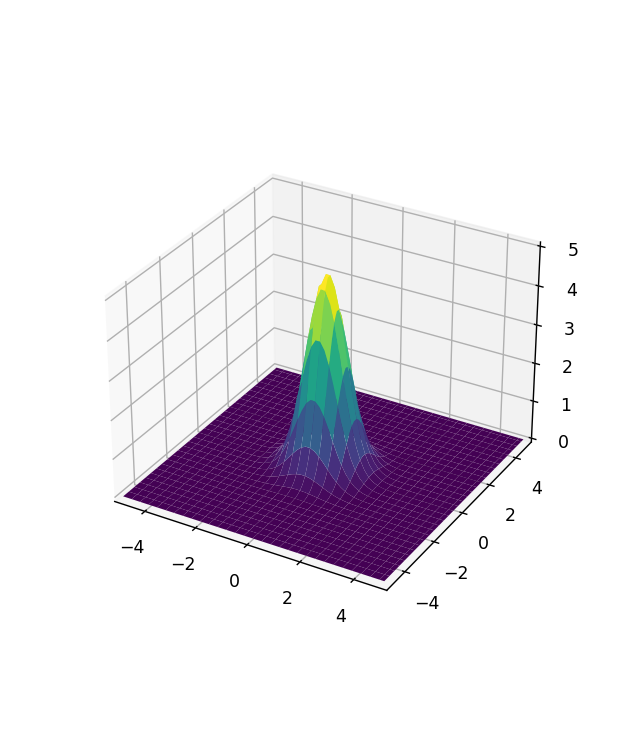

In [5]:
X,Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(0,5)
ax.plot_surface(X,Y,u[0,:,:],cmap='viridis')

In [6]:
def GetSolution():
    for l in tqdm(range(1, Nt)):
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                u[l, i, j] = u[l-1, i, j]+ v*(deltat/deltax**2)*(u[l-1,i+1,j]+u[l-1,i-1,j]+u[l-1,i,j+1]+u[l-1,i,j-1]-4*u[l-1,i,j])\
                - u[l-1, i, j]*(deltat/(2*deltax))*(u[l-1,i+1,j]-u[l-1,i-1,j]+u[l-1,i,j+1]-u[l-1,i,j-1])
                

In [7]:
GetSolution()

100%|████████████████████████████████████████████████████████████████████████████████| 499/499 [00:09<00:00, 51.62it/s]


<IPython.core.display.Javascript object>


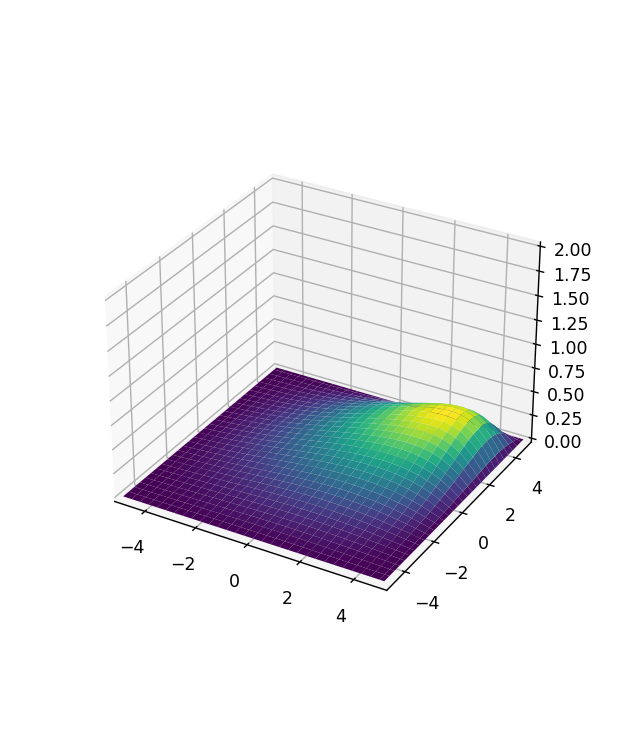

In [8]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')


X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,2)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)
plt.show()
